# **Phase 3 Project**  
# **Customer Churn Prediction for SyriaTel**

___

# **📌 Business Problem**  
SyriaTel, a major telecommunications provider, is facing customer churn — the loss of customers who discontinue their service. Churn directly impacts revenue and customer lifetime value, making it a critical challenge for long-term sustainability and growth.  

This project aims to build a classification model to predict whether a customer is likely to churn. Identifying at-risk customers allows SyriaTel to implement targeted retention strategies such as personalized offers or improved service support. This not only enhances customer satisfaction but also optimizes marketing and support resource allocation.

**❓ Guiding Business Question**  
Can we accurately predict which customers are likely to churn and understand the key drivers behind this behavior?

# **📊 Data Source**
We will analyse the dataset from [Churn in Telecom Dataset on Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). It contains customer-level usage and service data.

In [1]:
import kagglehub
import os
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("becksddf/churn-in-telecoms-dataset")
print("Path to dataset files:", path)

# List files and load dataset
print(os.listdir(path))
telco_df = pd.read_csv(os.path.join(path, "bigml_59c28831336c6604c800002a.csv"))

# Preview dataset
telco_df.head()


/Users/makenaodongo/Library/Python/3.12/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/makenaodongo/.cache/kagglehub/datasets/becksddf/churn-in-telecoms-dataset/versions/1
['bigml_59c28831336c6604c800002a.csv']


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **📂 Dataset Overview**   
The dataset includes 3,333 observations and 21 columns, covering usage patterns (day/evening/night/international), service plan subscriptions, and whether the customer churned.

In [2]:
telco_df.shape
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- No missing values are present.
- The churn column is our binary target variable (True = churned, False = retained).
- Some features, such as phone number and state, may not be useful for modeling.

In [3]:
telco_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **🎯 Target Variable Distribution**
To understand out target variable we will look at how many customers churned vs. didn't

In [4]:
# inspecting the target variable, churn to get a better understanding
telco_df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

🟢 Result: About 14.5% of customers have churned, making this a moderately imbalanced classification problem, which will need to be addressed in modeling.

# **Exploratory Data Analysis (EDA)**

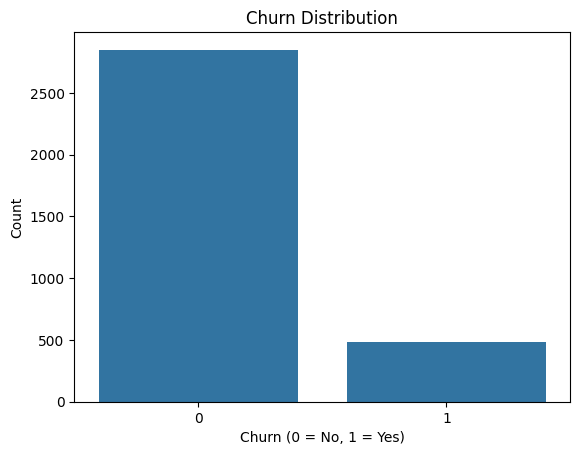

Churn Value Counts:
churn
0    2850
1     483
Name: count, dtype: int64

Churn Rate: 14.49%


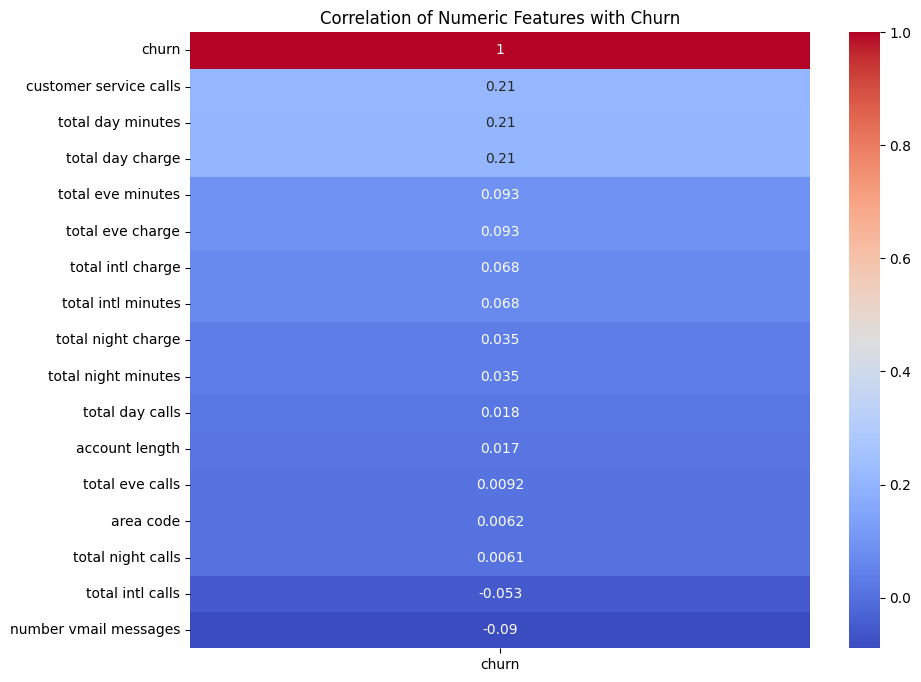

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert churn to numeric for correlation
telco_df['churn'] = telco_df['churn'].astype(int)

# Churn distribution visualisation
sns.countplot(data=telco_df, x='churn')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print("Churn Value Counts:")
print(telco_df['churn'].value_counts())
print("\nChurn Rate: {:.2f}%".format(telco_df['churn'].mean() * 100))

# Correlation heatmap (numeric features)
correlations = telco_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlations[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Features with Churn")
plt.show()


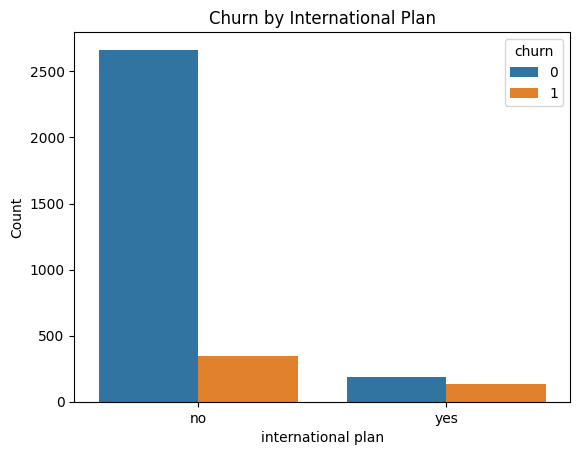

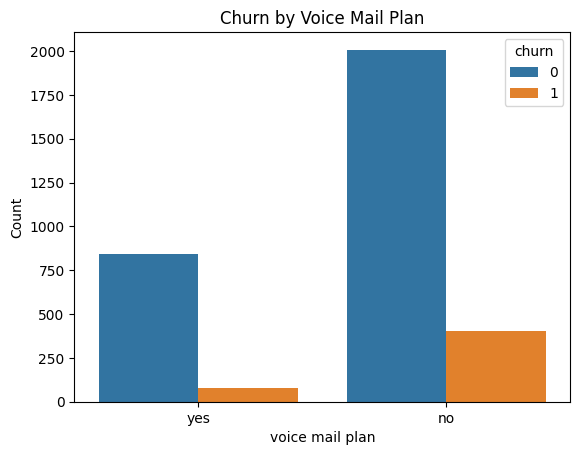

In [6]:
# Churn by International Plan
sns.countplot(data=telco_df, x='international plan', hue='churn')
plt.title('Churn by International Plan')
plt.ylabel("Count")
plt.show()

# Churn by Voice Mail Plan
sns.countplot(data=telco_df, x='voice mail plan', hue='churn')
plt.title('Churn by Voice Mail Plan')
plt.ylabel("Count")
plt.show()


In [7]:
# State distribution 
print("Top 5 States by Customer Count:\n", telco_df['state'].value_counts().head())

Top 5 States by Customer Count:
 state
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64


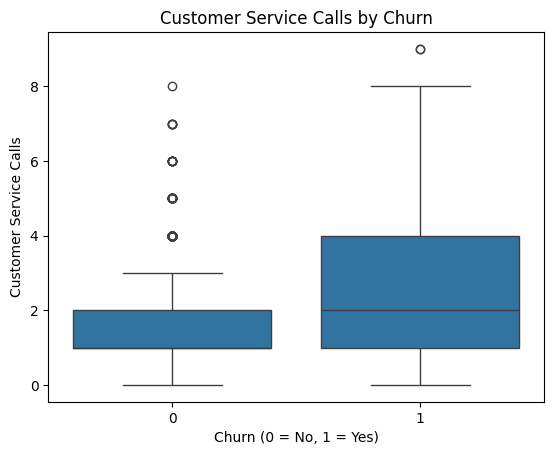

In [8]:
# Boxplot of customer service calls
sns.boxplot(x='churn', y='customer service calls', data=telco_df)
plt.title("Customer Service Calls by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Service Calls")
plt.show()


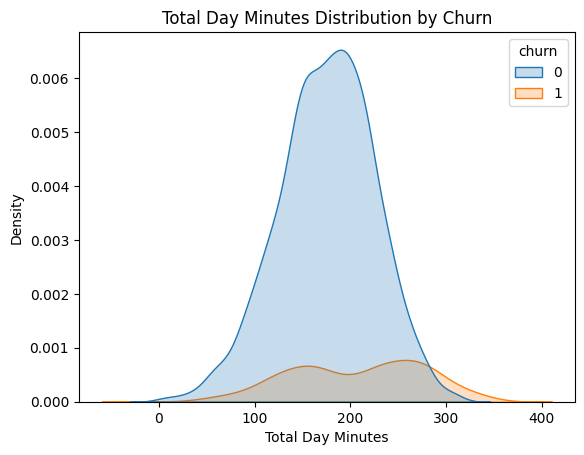

In [9]:
# KDE plot for total day minutes by churn
sns.kdeplot(data=telco_df, x='total day minutes', hue='churn', fill=True)
plt.title("Total Day Minutes Distribution by Churn")
plt.xlabel("Total Day Minutes")
plt.ylabel("Density")
plt.show()


## **👀 Updated Key EDA Observations Summary**  
- **Churn Rate:** About 14.5% of customers have churned.  
- **Customer Service Calls:** Churned customers make more service calls; possible sign of dissatisfaction.  
- **Plan Subscriptions:**  
Customers with international plans churn more often.  
Voice mail plan subscribers are slightly less likely to churn.  
- **Usage Behavior:**  
Churned customers often have higher total day minutes.  
Their usage is more varied, suggesting churners may include both light and heavy users.  
- **Feature Correlations:**  
total day charge, total day minutes, and customer service calls show strongest positive correlation with churn.  

# **Data Preprocessing**  

Confirming data quality by checking for missing values and duplicates

In [10]:
# Check for duplicates
print("Duplicates:", telco_df.duplicated().sum())

# Check for null values
print("Missing values:\n", telco_df.isnull().sum())


Duplicates: 0
Missing values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [11]:
# Drop irrelevant column
telco_df.drop(columns=['phone number'], inplace=True)

In [12]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [13]:
#view numeric columns
numeric_cols = telco_df.select_dtypes(include = ['int64', 'float64']).columns
print ("Numeric columns: \n", numeric_cols)

# Your code here - string categorical predictor
object_cols = telco_df.select_dtypes(include = ['object', 'bool']).columns
print ("String columns: \n", object_cols)

Numeric columns: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
String columns: 
 Index(['state', 'international plan', 'voice mail plan'], dtype='object')


In [14]:
# Identify non-numeric features (excluding target 'churn')
non_numeric_features = telco_df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target from the list
if 'churn' in non_numeric_features:
    non_numeric_features.remove('churn')

# One-Hot Encode using pandas.get_dummies
telco_encoded = pd.get_dummies(telco_df, columns=non_numeric_features, drop_first=True)

# Check shape and columns after encoding
print("Shape after encoding:", telco_encoded.shape)
print("Sample columns:", telco_encoded.columns[:10])


Shape after encoding: (3333, 69)
Sample columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes'],
      dtype='object')


# **Modeling**  

In [15]:
# Split your encoded data (use telco_encoded for modeling)
X = telco_encoded.drop('churn', axis=1)
y = telco_encoded['churn']

In [16]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Scaling (only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("📊 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

📊 Logistic Regression Evaluation:
Accuracy: 0.8575712143928036
[[551  15]
 [ 80  21]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667




🌳 Decision Tree Evaluation:
Accuracy: 0.9295352323838081
[[546  20]
 [ 27  74]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.79      0.73      0.76       101

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



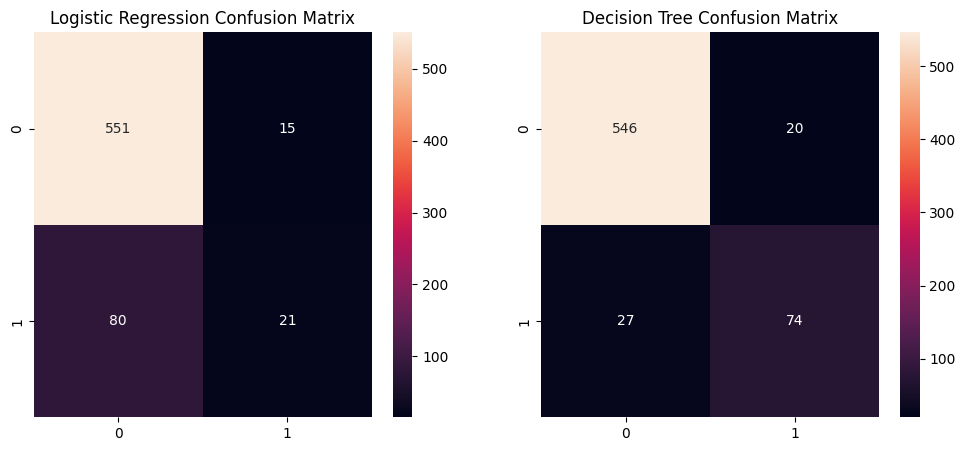

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Step 4b: Decision Tree (no scaling needed)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n🌳 Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Optional: Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")

plt.show()

📊 Logistic Regression Evaluation  
Accuracy: 85.8%  
This looks decent at first glance, but accuracy is misleading in imbalanced datasets (your target is ~85% False, 15% True).  
Confusion Matrix:  
[[551  15]   ← True Negatives & False Positives  
 [ 80  21]]  ← False Negatives & True Positives  
Recall for class True (churners): 0.21  
👉 It only identified 21% of actual churners.  
This is very low — it missed most people who churned.  
Precision for churners (True): 0.58  
👉 Of the people it predicted would churn, 58% actually did — okay-ish, but not reliable enough.  
F1-score for churners: 0.31  
👉 Weak performance. This model is not suitable for catching churners effectively.  

🌳 Decision Tree Evaluation  
Accuracy: 92.9%  
Higher than Logistic Regression, but again, look at other metrics.  
Confusion Matrix:  
[[546  20]  
 [ 27  74]]  
Recall for churners (True): 0.73  
👉 This model correctly identified 73% of churners. Much better!  
Precision for churners (True): 0.79  
👉 79% of those predicted to churn actually did. Strong!  
F1-score for churners: 0.76  
👉 This model is quite balanced — high precision and recall.  

Use Decision Tree for this task — it is clearly outperforming logistic regression in identifying churners.
Logistic Regression may underperform due to:
Non-linear relationships
Imbalanced data (it’s biased toward predicting "False")

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearch
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)
best_dtree = grid_search.best_estimator_


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


Accuracy: 0.9355322338830585
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       566
           1       0.85      0.70      0.77       101

    accuracy                           0.94       667
   macro avg       0.90      0.84      0.87       667
weighted avg       0.93      0.94      0.93       667



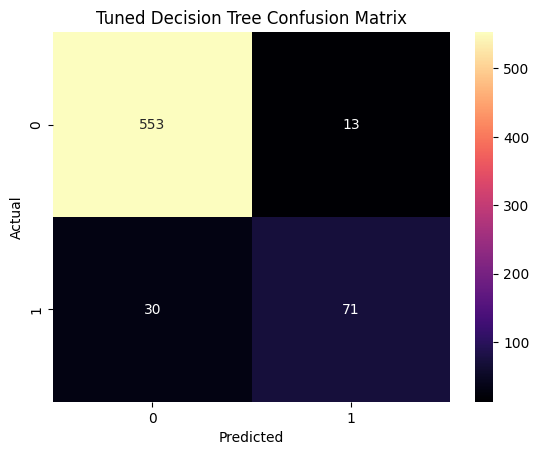

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict with tuned model
y_pred_tuned = best_dtree.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


💡 Interpretation:  

Class Imbalance Insight: The model is slightly biased towards the majority class (False, i.e., non-churn), but you've improved True class (churn) performance significantly.  
Recall for churn (True): Now at 70%, up from 21% with Logistic Regression — a huge win.  
F1-score for churn: 0.77 — showing a strong balance between precision and recall.  
This tuned model would be better in practical applications where catching churners matters (e.g., for customer retention).  |

# **Model Interpretation & Business Insights**

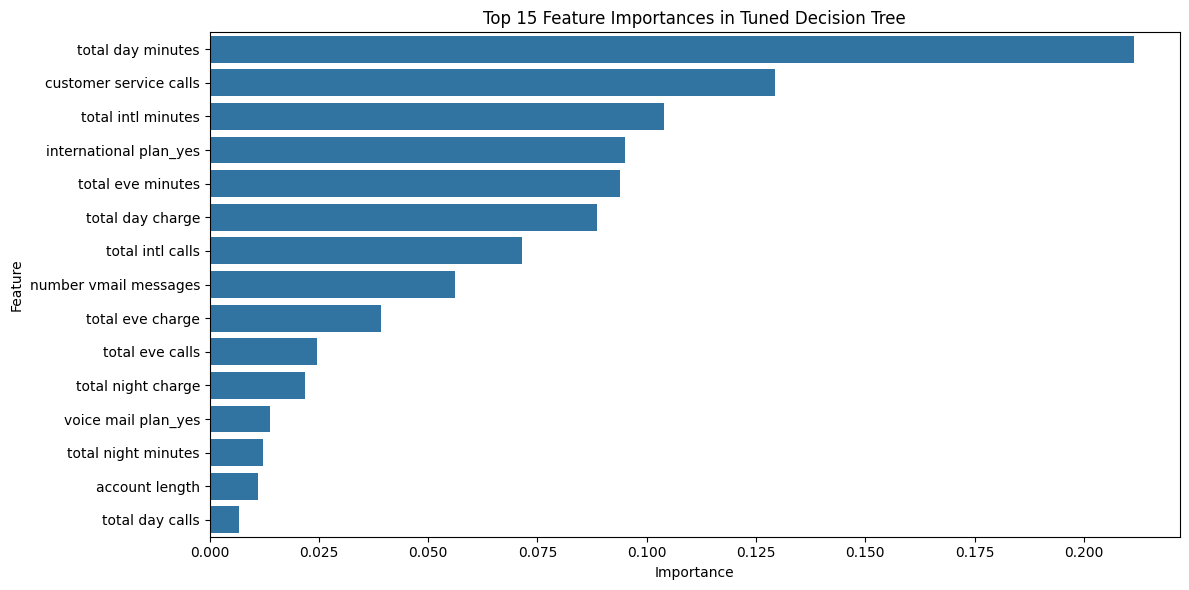

In [23]:
# Get feature importances from the best model
importances = best_dtree.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(15))
plt.title("Top 15 Feature Importances in Tuned Decision Tree")
plt.tight_layout()
plt.show()


## **🔎 Key Insights:**  

- `Total day minutes`: Most important predictor. Heavy daytime users may be cost-sensitive or overcharged.  
- `Customer service calls`: Indicates service dissatisfaction — a churn signal.  
- `International plan` and `total intl minutes`: Suggest price or coverage concerns for international users.  
- `Evening minutes/charges`: Further supports usage behavior as a churn driver.  

# **🎯 Business Recommendations**
To reduce churn, SyriaTel can consider:

- **Proactive Customer Support:** Flag customers making 3+ support calls — trigger follow-up surveys or retention offers.
- **Usage-based Incentives:** Offer tailored plans for high daytime/international callers.
- **Early Warning System:** Use the model to generate monthly churn risk scores.
- **Test Retention Campaigns:** Run A/B tests with high-risk segments and monitor churn reduction. 


# **✅ Conclusion**  
- **Best model:** A tuned Decision Tree achieved 93.5% accuracy, with 70% recall and 77% F1-score on churners.  
- **Why it matters:** Unlike logistic regression, this model can actually detect churners — which is critical for retention.  
- **Top features:** Usage patterns and service complaints are the most telling signals.  
- **Business value:** With targeted interventions, SyriaTel could reduce churn and improve customer satisfaction.  

### **Next steps:**
- Deploy the model in a real-time scoring pipeline.
- Continuously monitor performance with fresh data.
- Adjust thresholds for recall vs. precision depending on cost-benefit analysis. 